In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('max_columns',None)

### Train data

In [2]:
#importing csv fiC:\Users\satvi\OneDrive\Desktop\baseballle
data_train=pd.read_excel(r'C:\Users\satvi\OneDrive\Desktop\flight_Data_Train (1).xlsx')
data_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
#Checking for the shape of the data
data_train.shape

(10683, 11)

The dataset consists of 10683 rows and 11 columns.

In [4]:
#checking for the null values
data_train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

There are total 2 nulls in the dataset one is in route column and other is in total_stops column we use imputing techinque and fill the null values.


In [5]:
#Checking for info method
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


All the columns in the dataset are of object type and the label column is of integer type.

In [6]:
#checking for stats
data_train.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


The average flight charges are 9087,Minimum price is 1759 and max it gone upto 79512.


In [7]:
#filling the null values using mode method
data_train['Route']=data_train['Route'].fillna(data_train['Route'].mode()[0])
data_train['Total_Stops']=data_train['Total_Stops'].fillna(data_train['Total_Stops'].mode()[0])

In [8]:
#Checking value counts for all the categorical columns

In [9]:
data_train['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

The passengers have used different airlines to travel.

In [10]:
data_train['Date_of_Journey'].value_counts()

18/05/2019    504
6/06/2019     503
21/05/2019    497
9/06/2019     495
12/06/2019    493
9/05/2019     484
21/03/2019    423
15/05/2019    405
27/05/2019    382
27/06/2019    355
24/06/2019    351
1/06/2019     342
3/06/2019     333
15/06/2019    328
24/03/2019    323
6/03/2019     308
27/03/2019    299
24/05/2019    286
6/05/2019     282
1/05/2019     277
12/05/2019    259
1/04/2019     257
3/03/2019     218
9/03/2019     200
15/03/2019    162
18/03/2019    156
01/03/2019    152
12/03/2019    142
9/04/2019     125
3/04/2019     110
21/06/2019    109
18/06/2019    105
09/03/2019    102
6/04/2019     100
03/03/2019     97
06/03/2019     95
27/04/2019     94
24/04/2019     92
3/05/2019      90
15/04/2019     89
21/04/2019     82
18/04/2019     67
12/04/2019     63
1/03/2019      47
Name: Date_of_Journey, dtype: int64

All the flight prices details are collected  of 2019.so we will seperate the month and day of the journey because our model cannot understand string type of data.

In [11]:
data_train['Source'].value_counts()

Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

The passengers have travelled from different sources.

In [12]:
data_train['Destination'].value_counts()

Cochin       4537
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [13]:

data_train['Destination']=data_train['Destination'].replace('New Delhi','Delhi')

In [14]:
data_train['Route'].value_counts()

DEL → BOM → COK                2377
BLR → DEL                      1552
CCU → BOM → BLR                 979
CCU → BLR                       724
BOM → HYD                       621
                               ... 
CCU → VTZ → BLR                   1
BOM → JDH → JAI → DEL → HYD       1
BOM → RPR → VTZ → HYD             1
BOM → GOI → HYD                   1
BLR → HBX → BOM → AMD → DEL       1
Name: Route, Length: 128, dtype: int64


The routes to travel from to the destination by the passengers.

In [15]:
data_train['Additional_Info'].value_counts()

No info                         8345
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64


### EDA

In [16]:
#Converting the date of journey columns into day month and year 
data_train['date_of_Journey']=pd.to_datetime(data_train['Date_of_Journey'],format="%d/%m/%Y").dt.day
data_train['month_of_journey']=pd.to_datetime(data_train['Date_of_Journey'],format="%d/%m/%Y").dt.month

In [17]:
#converting the Arrival_Time into hours,minutes and seconds.
data_train['Dep_hour']=pd.to_datetime(data_train['Dep_Time']).dt.hour
data_train['Dep_minute']=pd.to_datetime(data_train['Dep_Time']).dt.minute

In [18]:
#converting the Arrival_Time into hours,minutes and seconds.
data_train['Arrival_hour']=pd.to_datetime(data_train['Arrival_Time']).dt.hour
data_train['Arrival_minute']=pd.to_datetime(data_train['Arrival_Time']).dt.minute

In [19]:
data_train.drop(columns=['Date_of_Journey','Dep_Time','Arrival_Time'],axis=1,inplace=True)

In [20]:
data_train

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,date_of_Journey,month_of_journey,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute
0,IndiGo,Banglore,Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,2h 30m,non-stop,No info,4107,9,4,19,55,22,25
10679,Air India,Kolkata,Banglore,CCU → BLR,2h 35m,non-stop,No info,4145,27,4,20,45,23,20
10680,Jet Airways,Banglore,Delhi,BLR → DEL,3h,non-stop,No info,7229,27,4,8,20,11,20
10681,Vistara,Banglore,Delhi,BLR → DEL,2h 40m,non-stop,No info,12648,1,3,11,30,14,10


In [21]:
#converting the duration column
duration=list(data_train['Duration'])
for i in range(len(duration)):
    if len(duration[i].split()) != 2:
        if 'h' in duration[i]:
            duration[i]=duration[i].strip()+' 0m'
        else:
            duration[i]="0h "+ duration[i]
duration_hours=[]
duration_mins=[]
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep="h")[0]))
    duration_mins.append(int(duration[i].split(sep="m")[0].split()[-1]))        
        

In [22]:
data_train['Duration_hours']=duration_hours
data_train['Duration_mins']=duration_mins

In [23]:
data_train.drop(columns=['Duration'],axis=1,inplace=True)

In [24]:
data_train

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,date_of_Journey,month_of_journey,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Duration_hours,Duration_mins
0,IndiGo,Banglore,Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,non-stop,No info,4107,9,4,19,55,22,25,2,30
10679,Air India,Kolkata,Banglore,CCU → BLR,non-stop,No info,4145,27,4,20,45,23,20,2,35
10680,Jet Airways,Banglore,Delhi,BLR → DEL,non-stop,No info,7229,27,4,8,20,11,20,3,0
10681,Vistara,Banglore,Delhi,BLR → DEL,non-stop,No info,12648,1,3,11,30,14,10,2,40


In [25]:
#I feel route and additional info is not required for prediction
data_train.drop(columns=['Route','Additional_Info'],axis=1,inplace=True)

In [26]:
data_train['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [27]:
data_train['Source'].value_counts()

Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [28]:
data_train['Destination'].value_counts()

Cochin       4537
Banglore     2871
Delhi        2197
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [29]:
data_train['Total_Stops'].value_counts()

1 stop      5626
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

<Figure size 7200x3600 with 0 Axes>

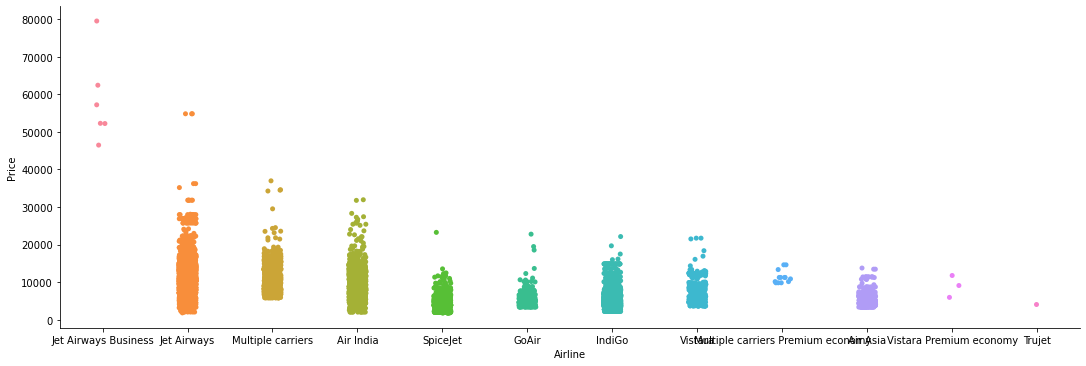

In [30]:

#Lets plot count plot on categorical column and check the data
plt.figure(figsize=(100,50))
sns.catplot(y='Price',x='Airline',data=data_train.sort_values('Price',ascending=False),height=5,aspect=3)
plt.show()

The garph says that the prices of jet airways business has high prices.

<Figure size 7200x3600 with 0 Axes>

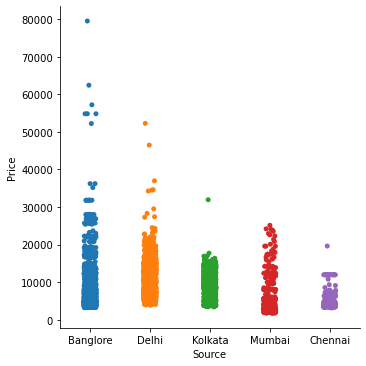

In [31]:
#Lets plot count plot on categorical column and check the data
plt.figure(figsize=(100,50))
sns.catplot(x='Source',y='Price',data=data_train.sort_values('Price',ascending=False))
plt.show()

The record says that prices are high,travelling from bangalore.There are outliers present in the Bangalore data.

<Figure size 7200x3600 with 0 Axes>

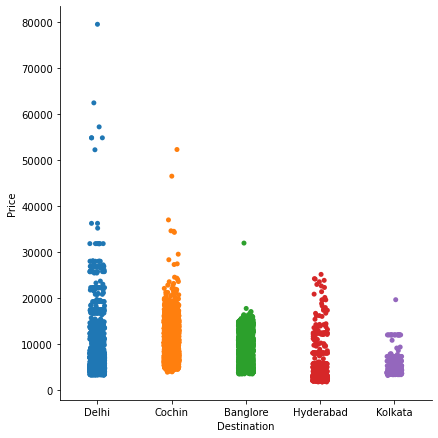

In [32]:
#Lets plot count plot on categorical column and check the data
plt.figure(figsize=(100,50))
sns.catplot(x='Destination',y='Price',data=data_train.sort_values('Price',ascending=False),height=6)
plt.show()

The records says that prices are high if we travel to New Delhi and plot also says that there some outliers present in the new delhi column.

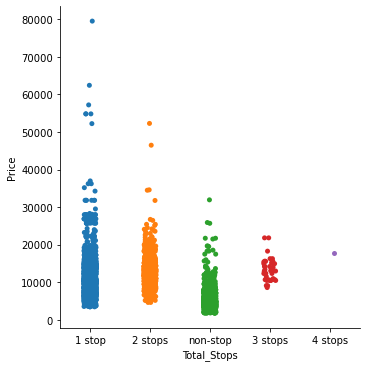

In [33]:
sns.catplot(x='Total_Stops',y='Price',data=data_train.sort_values('Price',ascending=False))

The prices are high if we choose number of stops as 1

Since all the columns are of categorical type we no need to check for ouliers are skewness present in the data.

In [34]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Airline           10683 non-null  object
 1   Source            10683 non-null  object
 2   Destination       10683 non-null  object
 3   Total_Stops       10683 non-null  object
 4   Price             10683 non-null  int64 
 5   date_of_Journey   10683 non-null  int64 
 6   month_of_journey  10683 non-null  int64 
 7   Dep_hour          10683 non-null  int64 
 8   Dep_minute        10683 non-null  int64 
 9   Arrival_hour      10683 non-null  int64 
 10  Arrival_minute    10683 non-null  int64 
 11  Duration_hours    10683 non-null  int64 
 12  Duration_mins     10683 non-null  int64 
dtypes: int64(9), object(4)
memory usage: 1.1+ MB


In [35]:
#checking for categorical columns
cat_col=[]
for i in data_train.dtypes.index:
    if data_train.dtypes[i]=='object':
        cat_col.append(i)
cat_col

['Airline', 'Source', 'Destination', 'Total_Stops']

In [36]:
#checking for numerical columns
num_col=[]
for i in data_train.dtypes.index:
    if data_train.dtypes[i]!='object':
        num_col.append(i)
num_col

['Price',
 'date_of_Journey',
 'month_of_journey',
 'Dep_hour',
 'Dep_minute',
 'Arrival_hour',
 'Arrival_minute',
 'Duration_hours',
 'Duration_mins']

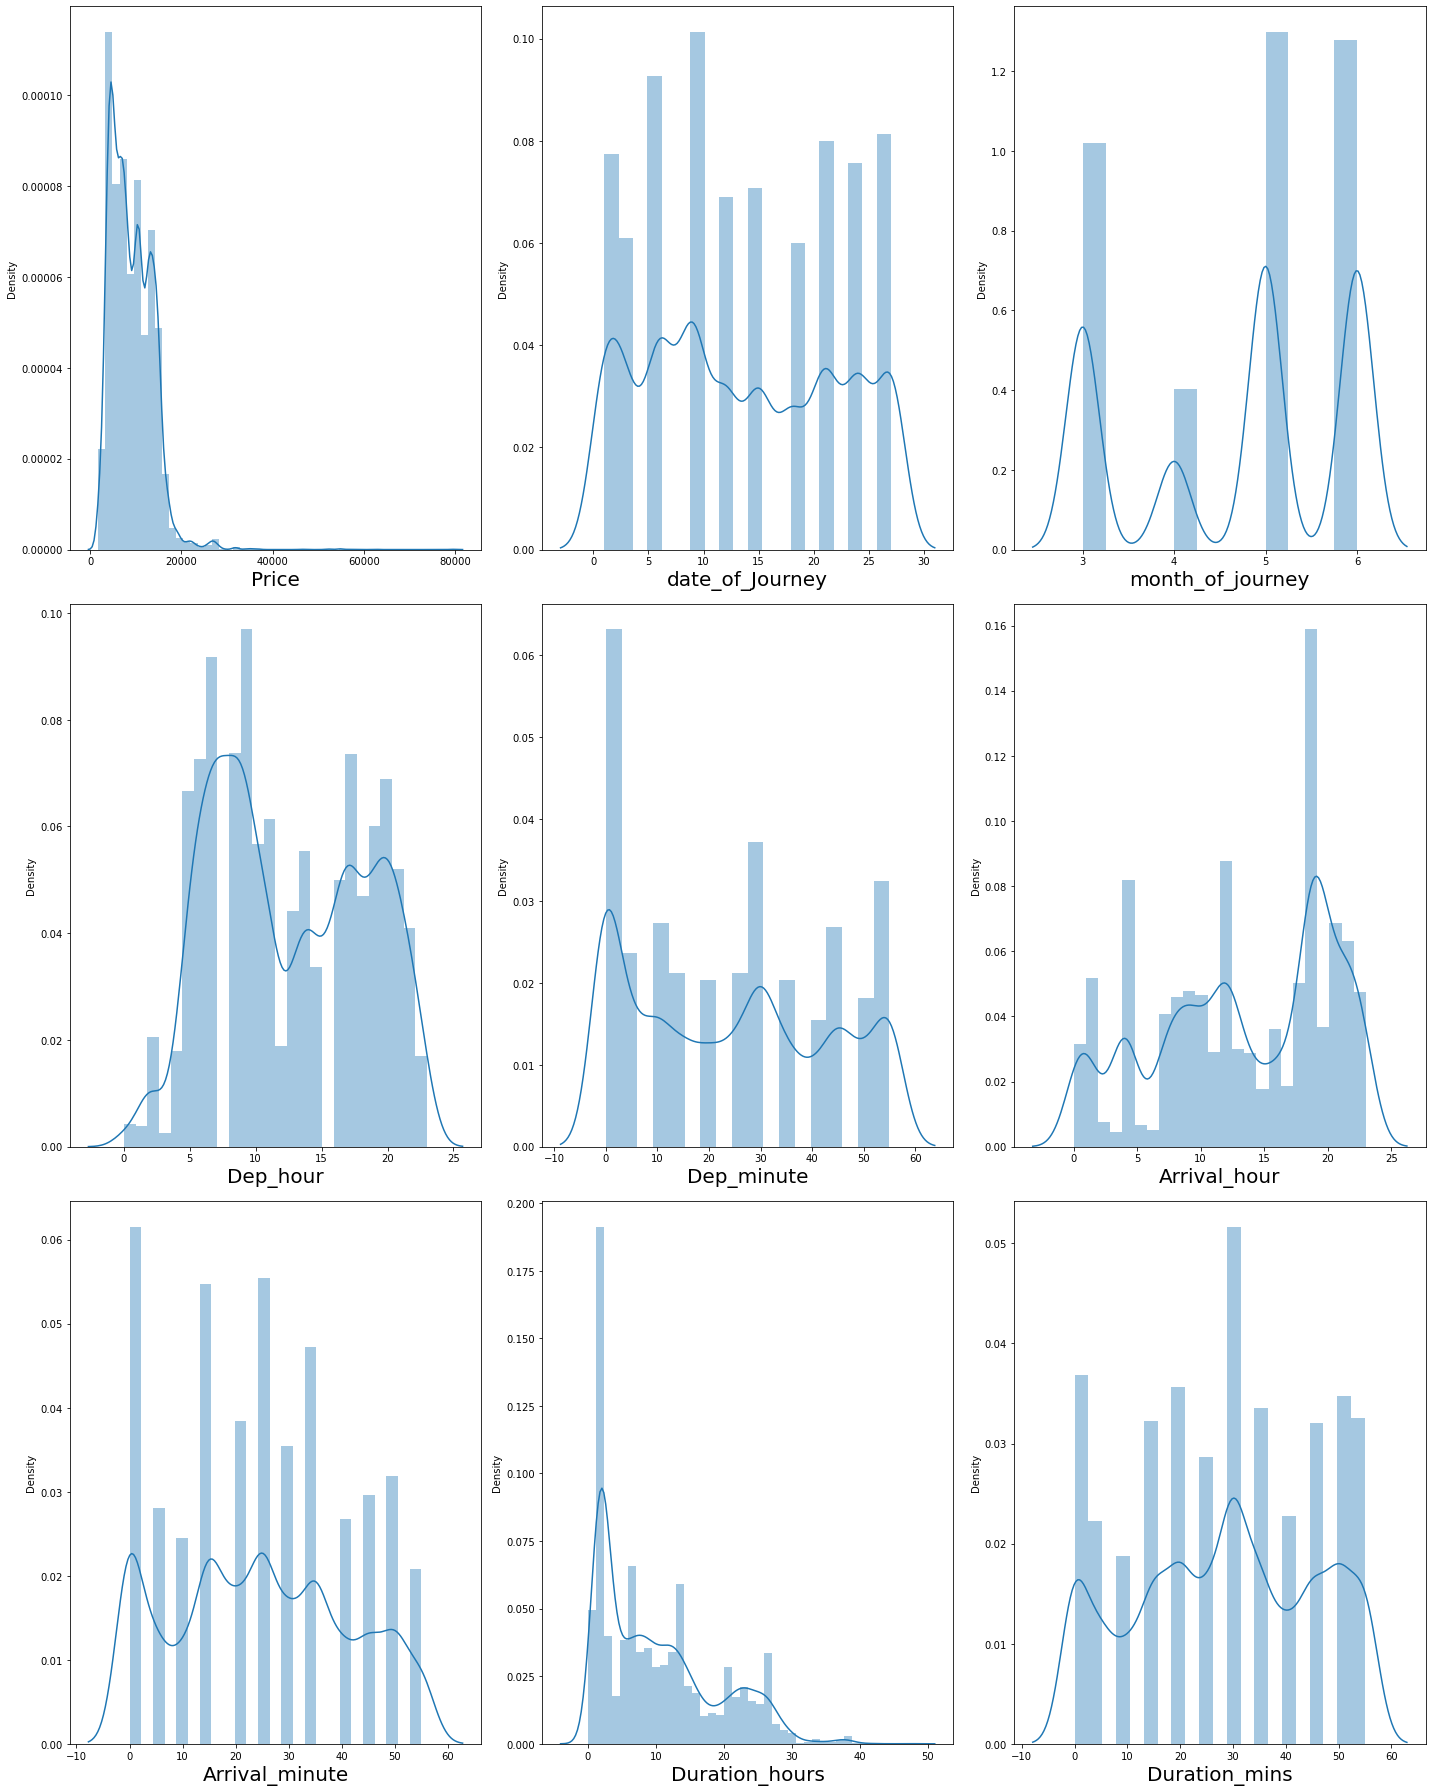

In [37]:
#Now lets plot dist plot and visualise how the data is distributed in each column
#lets plot the distribution plot to check the distribution of our data
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in num_col:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(data_train[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()


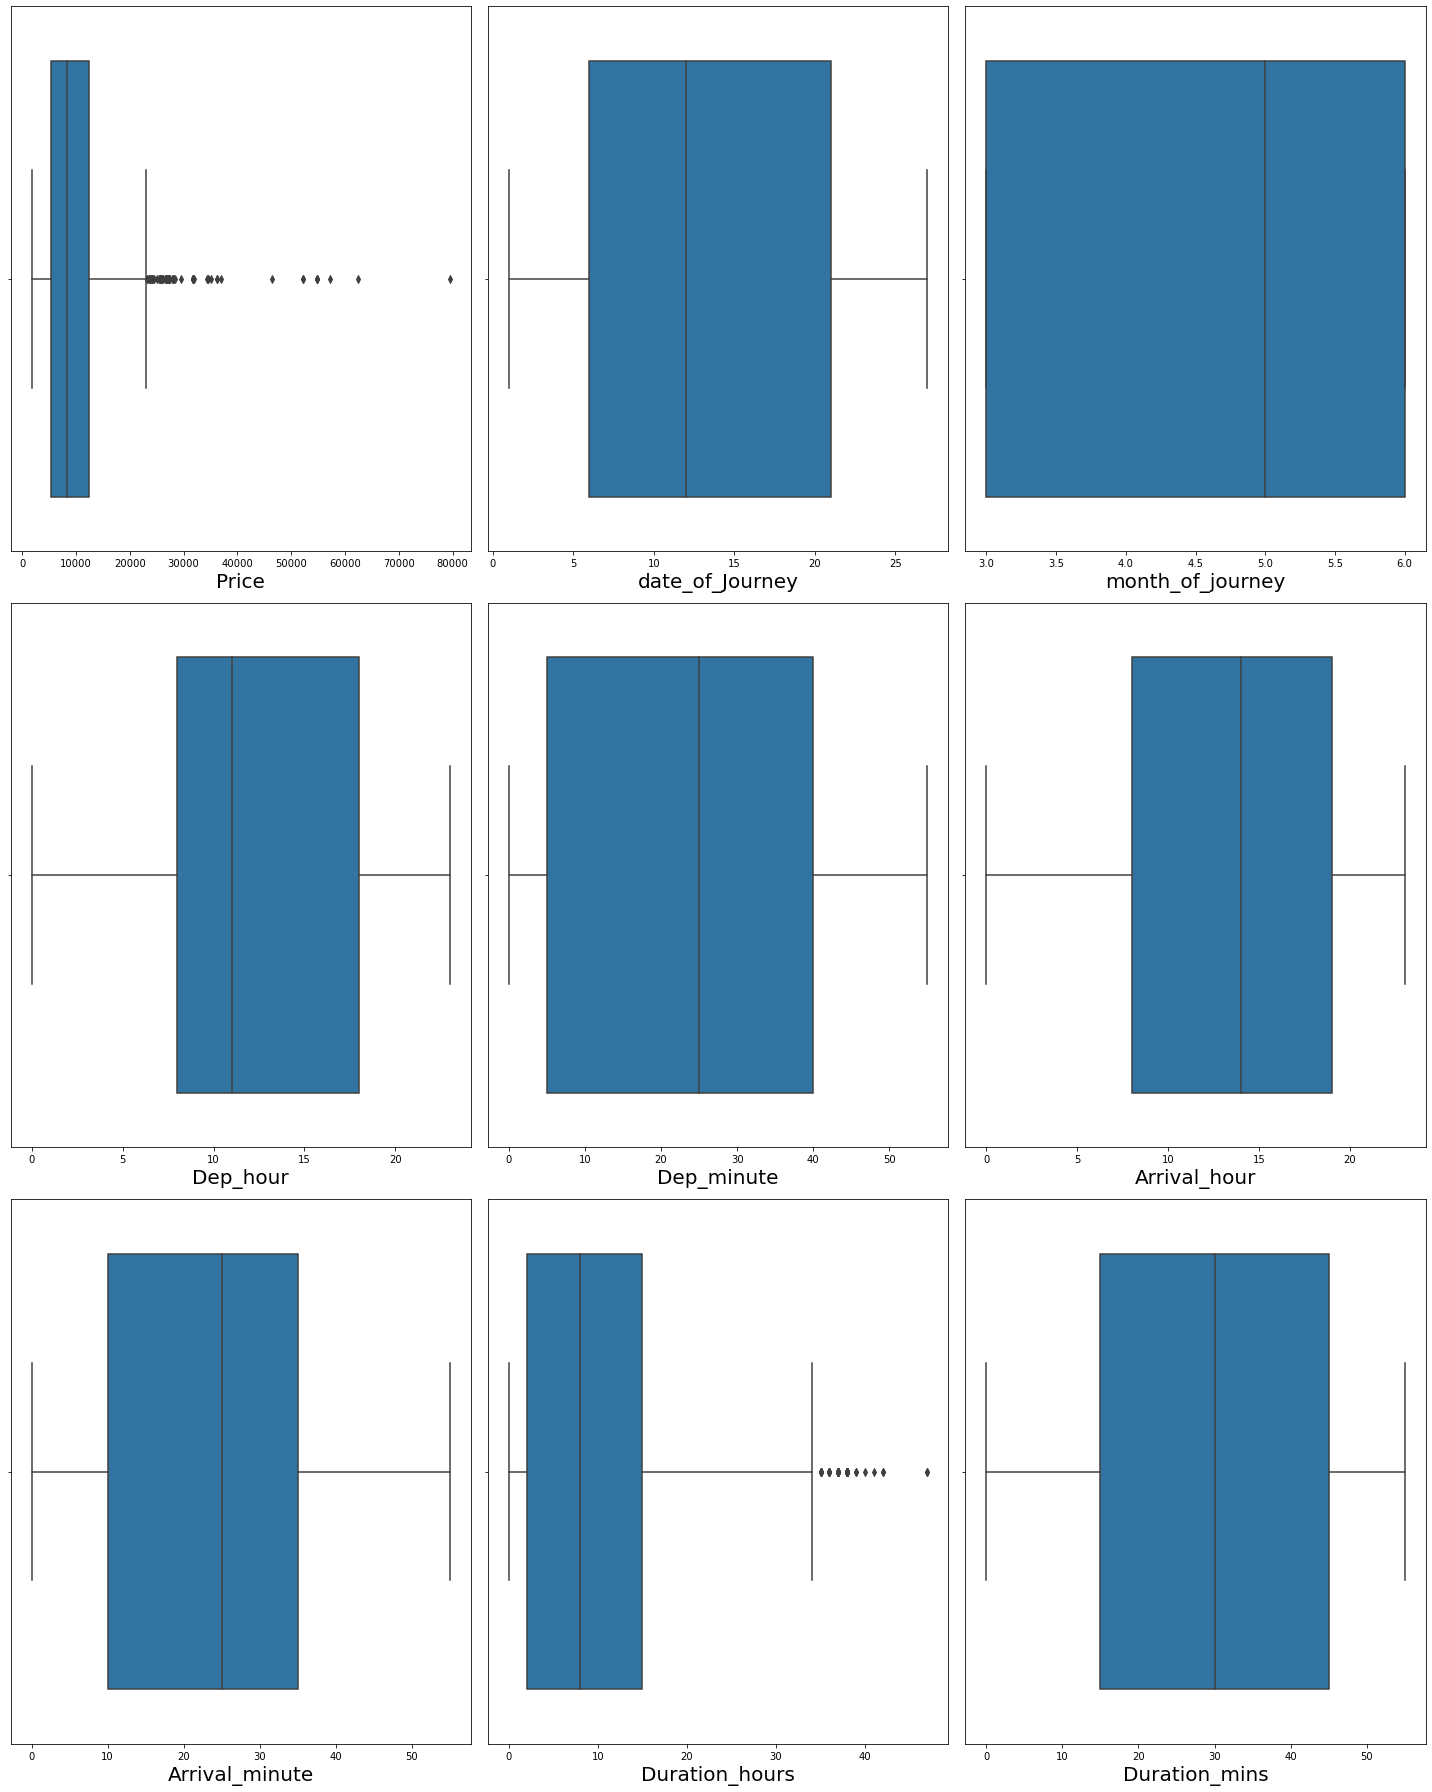

In [38]:
#Plotting the box plot to check the outliers
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in num_col:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(data_train[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()


There are outliers present in our label and duration hours, since price is our label we shall keep that how as it is but am applying zscore on Duration hours.

In [39]:
#Applying Z score method to remove outliers
#importing the stats from the scipy library
from scipy import stats
#lets remove outiers using z_score
z=np.abs(stats.zscore(data_train['Duration_hours']))#abs=absolute numberprint(z)
print(z)

[0.97069753 0.38211718 1.03047566 ... 0.85298146 0.97069753 0.26440111]


In [40]:
print('Row Numbers:',np.where(z>3)[0])

Row Numbers: [  226   553   966   969  1067  1113  1346  1442  1496  1551  1657  1791
  1804  2172  2553  2641  2654  2718  3457  3790  3815  3966  4047  4118
  4463  4655  5516  5701  5711  5782  5933  5953  6059  6085  6321  6476
  6884  7189  7232  7306  7329  7553  7611  7612  7876  7906  8127  8153
  8360  8409  8412  8601  8621  8698  8729  9247  9396  9484  9551  9673
  9703  9848 10020 10326 10456 10639]


In [41]:
#dropping some of the data of rows which r having outliers
index=(np.where(z>3)[0])
data_train.drop(data_train.index[index])


,Airline,Source,Destination,Total_Stops,Price,date_of_Journey,month_of_journey,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Duration_hours,Duration_mins
0,IndiGo,Banglore,Delhi,non-stop,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,Delhi,1 stop,13302,1,3,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,non-stop,4107,9,4,19,55,22,25,2,30
10679,Air India,Kolkata,Banglore,non-stop,4145,27,4,20,45,23,20,2,35
10680,Jet Airways,Banglore,Delhi,non-stop,7229,27,4,8,20,11,20,3,0
10681,Vistara,Banglore,Delhi,non-stop,12648,1,3,11,30,14,10,2,40


In [42]:
data_train.shape

(10683, 13)

In [43]:

#Lets Encode the columns
#We shall use one hot encoder for nominal data
df=pd.get_dummies(data_train['Airline'],drop_first=True)
df

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
10678,0,0,0,0,0,0,0,0,0,0,0
10679,1,0,0,0,0,0,0,0,0,0,0
10680,0,0,0,1,0,0,0,0,0,0,0
10681,0,0,0,0,0,0,0,0,0,1,0


In [44]:
df1=pd.get_dummies(data_train['Source'],drop_first=True)
df1

,Chennai,Delhi,Kolkata,Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0
...,...,...,...,...
10678,0,0,1,0
10679,0,0,1,0
10680,0,0,0,0
10681,0,0,0,0


In [45]:
df2=pd.get_dummies(data_train['Destination'],drop_first=True)
df2

,Cochin,Delhi,Hyderabad,Kolkata
0,0,1,0,0
1,0,0,0,0
2,1,0,0,0
3,0,0,0,0
4,0,1,0,0
...,...,...,...,...
10678,0,0,0,0
10679,0,0,0,0
10680,0,1,0,0
10681,0,1,0,0


In [46]:
#Lets use label encoder for odinal data
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data_train['Total_Stops']=le.fit_transform(data_train['Total_Stops'])

In [47]:
#Concating all the dataframes with actual data_train
data_train=pd.concat([data_train,df,df1,df2],axis=1)

In [48]:
data_train

,Airline,Source,Destination,Total_Stops,Price,date_of_Journey,month_of_journey,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Duration_hours,Duration_mins,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata
0,IndiGo,Banglore,Delhi,4,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,Air India,Kolkata,Banglore,1,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,1,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
3,IndiGo,Kolkata,Banglore,0,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,IndiGo,Banglore,Delhi,0,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,4,4107,9,4,19,55,22,25,2,30,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
10679,Air India,Kolkata,Banglore,4,4145,27,4,20,45,23,20,2,35,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
10680,Jet Airways,Banglore,Delhi,4,7229,27,4,8,20,11,20,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
10681,Vistara,Banglore,Delhi,4,12648,1,3,11,30,14,10,2,40,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0


In [49]:
data_train.drop(columns=['Airline','Source','Destination'],axis=1,inplace=True)

In [50]:
data_train

,Total_Stops,Price,date_of_Journey,month_of_journey,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Duration_hours,Duration_mins,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata
0,4,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,1,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,1,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
3,0,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,4,4107,9,4,19,55,22,25,2,30,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
10679,4,4145,27,4,20,45,23,20,2,35,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
10680,4,7229,27,4,8,20,11,20,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
10681,4,12648,1,3,11,30,14,10,2,40,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0


### Test data

In [51]:
test_data=pd.read_excel(r'C:\Users\satvi\OneDrive\Desktop\flight_Data_Train (2).xlsx')
test_data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


In [52]:
test_data.shape

(2671, 10)

In [53]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


In [54]:
test_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [55]:
#Converting the date of journey columns into day month and year 
test_data['date_of_Journey']=pd.to_datetime(test_data['Date_of_Journey'],format="%d/%m/%Y").dt.day
test_data['month_of_journey']=pd.to_datetime(test_data['Date_of_Journey'],format="%d/%m/%Y").dt.month

In [56]:
#converting the Arrival_Time into hours,minutes and seconds.
test_data['Dep_hour']=pd.to_datetime(test_data['Dep_Time']).dt.hour
test_data['Dep_minute']=pd.to_datetime(test_data['Dep_Time']).dt.minute

In [57]:
#converting the Arrival_Time into hours,minutes and seconds.
test_data['Arrival_hour']=pd.to_datetime(test_data['Arrival_Time']).dt.hour
test_data['Arrival_minute']=pd.to_datetime(test_data['Arrival_Time']).dt.minute

In [58]:
#Dropping the splitted columns
test_data.drop(columns=['Date_of_Journey','Dep_Time','Arrival_Time'],axis=1,inplace=True)

In [59]:
#converting the duration column
duration=list(test_data['Duration'])
for i in range(len(duration)):
    if len(duration[i].split()) != 2:
        if 'h' in duration[i]:
            duration[i]=duration[i].strip()+' 0m'
        else:
            duration[i]="0h "+ duration[i]
duration_hours=[]
duration_mins=[]
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep="h")[0]))
    duration_mins.append(int(duration[i].split(sep="m")[0].split()[-1]))        
        

In [60]:
test_data['Duration_hours']=duration_hours
test_data['Duration_mins']=duration_mins

In [61]:
test_data.drop(columns=['Duration'],axis=1,inplace=True)

In [62]:
test_data.drop(columns=['Route','Additional_Info'],axis=1,inplace=True)

In [63]:
test_data

,Airline,Source,Destination,Total_Stops,date_of_Journey,month_of_journey,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Duration_hours,Duration_mins
0,Jet Airways,Delhi,Cochin,1 stop,6,6,17,30,4,25,10,55
1,IndiGo,Kolkata,Banglore,1 stop,12,5,6,20,10,20,4,0
2,Jet Airways,Delhi,Cochin,1 stop,21,5,19,15,19,0,23,45
3,Multiple carriers,Delhi,Cochin,1 stop,21,5,8,0,21,0,13,0
4,Air Asia,Banglore,Delhi,non-stop,24,6,23,55,2,45,2,50
...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,1 stop,6,6,20,30,20,25,23,55
2667,IndiGo,Kolkata,Banglore,non-stop,27,3,14,20,16,55,2,35
2668,Jet Airways,Delhi,Cochin,1 stop,6,3,21,50,4,25,6,35
2669,Air India,Delhi,Cochin,1 stop,6,3,4,0,19,15,15,15


In [64]:
#Lets Encode the columns
#We shall use one hot encoder for nominal data
Air_line=pd.get_dummies(test_data['Airline'],drop_first=True)
Air_line

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara,Vistara Premium economy
0,0,0,0,1,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
2666,1,0,0,0,0,0,0,0,0,0
2667,0,0,1,0,0,0,0,0,0,0
2668,0,0,0,1,0,0,0,0,0,0
2669,1,0,0,0,0,0,0,0,0,0


In [65]:
source=pd.get_dummies(test_data['Source'],drop_first=True)
source

,Chennai,Delhi,Kolkata,Mumbai
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,0,1,0,0
4,0,0,0,0
...,...,...,...,...
2666,0,0,1,0
2667,0,0,1,0
2668,0,1,0,0
2669,0,1,0,0


In [66]:
destination=pd.get_dummies(test_data['Destination'],drop_first=True)
destination

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,1,0,0,0,0
1,0,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,0,1,0,0,0
...,...,...,...,...,...
2666,0,0,0,0,0
2667,0,0,0,0,0
2668,1,0,0,0,0
2669,1,0,0,0,0


In [67]:
#Lets use label encoder for odinal data
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
test_data['Total_Stops']=le.fit_transform(test_data['Total_Stops'])

In [68]:
#Concating all the dataframes with actual data_train
test_data=pd.concat([test_data,Air_line,source,destination],axis=1)

In [69]:
test_data.drop(columns=['Airline','Source','Destination'],axis=1,inplace=True)

In [70]:
test_data

,Total_Stops,date_of_Journey,month_of_journey,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Duration_hours,Duration_mins,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,6,6,17,30,4,25,10,55,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,0,12,5,6,20,10,20,4,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0,21,5,19,15,19,0,23,45,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,0,21,5,8,0,21,0,13,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
4,4,24,6,23,55,2,45,2,50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,0,6,6,20,30,20,25,23,55,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2667,4,27,3,14,20,16,55,2,35,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2668,0,6,3,21,50,4,25,6,35,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
2669,0,6,3,4,0,19,15,15,15,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0


#### Checking for correlation using heat map

<AxesSubplot:>

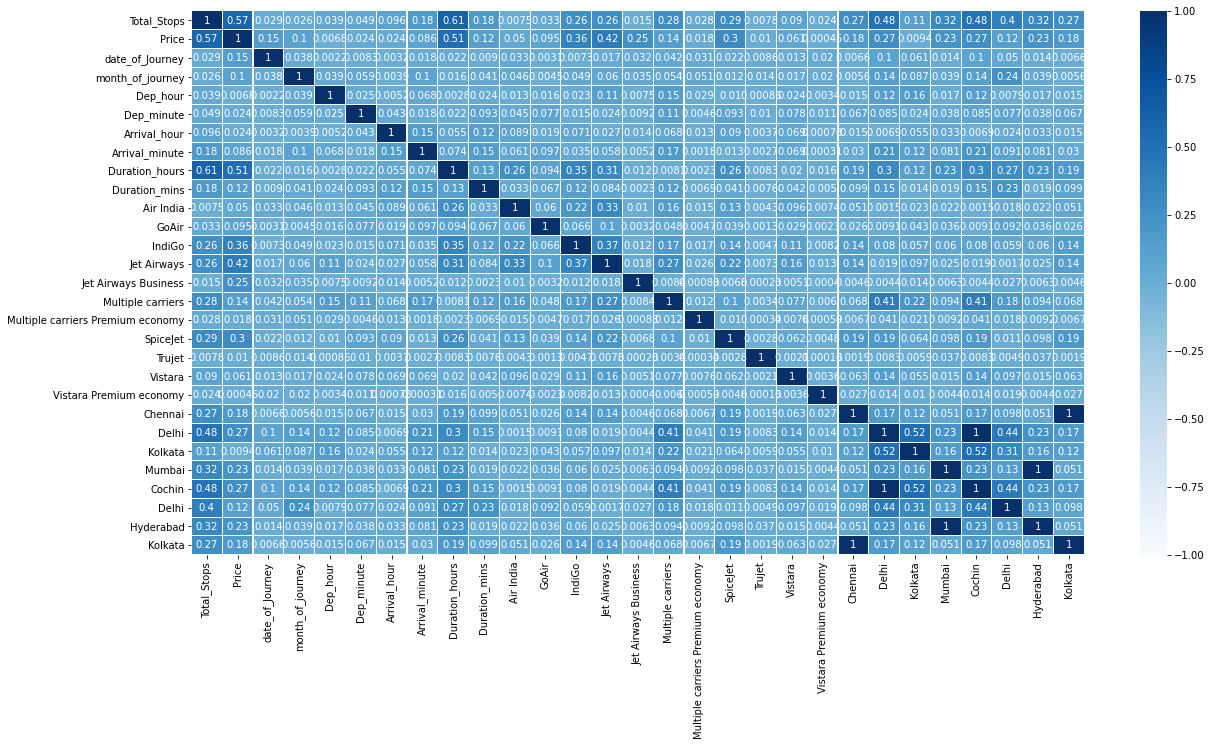

In [71]:
data_corr=data_train.corr().abs()
plt.figure(figsize=(20,10))
sns.heatmap(data_corr,cmap='Blues',vmin=-1,vmax=1,annot=True,fmt='.2g',linewidth=0.1,center=0)

1.The Dark blue indicates high correlation and light blue indicates less correlation.

2.Our label price is highly correlated with total stops,and also correlated with duration hours.Duration hours are highly correlated with total stops,some cities are correlated with other cities.

### Data Visualisation of Varience

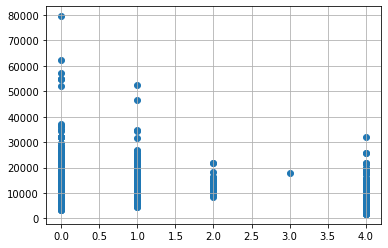

In [72]:
var='Total_Stops'
plt.scatter(x=data_train[var], y=data_train['Price'])
plt.grid(True)

The changes in the price levels  as the number stops varies.

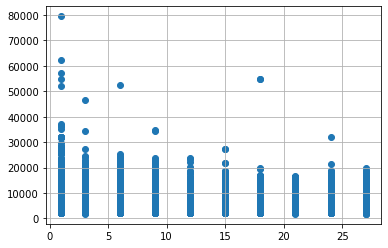

In [73]:
var='date_of_Journey'
plt.scatter(x=data_train[var], y=data_train['Price'])
plt.grid(True)

The prices variations with the change in dates.

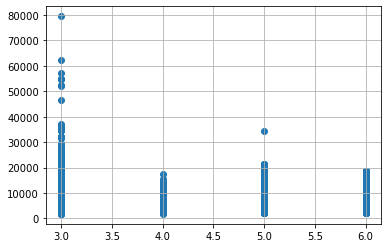

In [74]:
var='month_of_journey'
plt.scatter(x=data_train[var], y=data_train['Price'])
plt.grid(True)

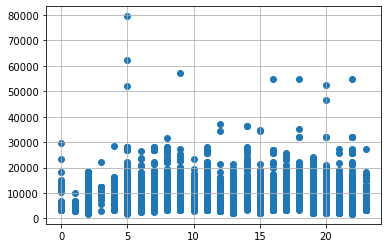

In [75]:
var='Dep_hour'
plt.scatter(x=data_train[var], y=data_train['Price'])
plt.grid(True)

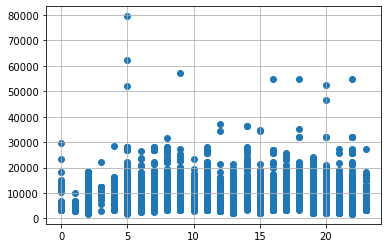

In [76]:
var='Dep_hour'
plt.scatter(x=data_train[var], y=data_train['Price'])
plt.grid(True)

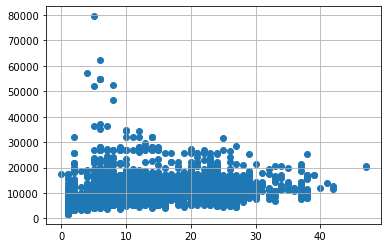

In [77]:
var='Duration_hours'
plt.scatter(x=data_train[var], y=data_train['Price'])
plt.grid(True)

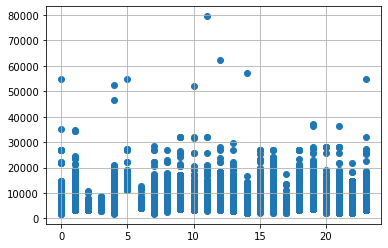

In [78]:
var='Arrival_hour'
plt.scatter(x=data_train[var], y=data_train['Price'])
plt.grid(True)

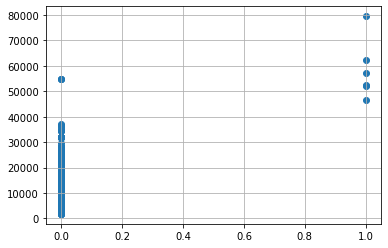

In [79]:
var='Jet Airways Business'
plt.scatter(x=data_train[var], y=data_train['Price'])
plt.grid()

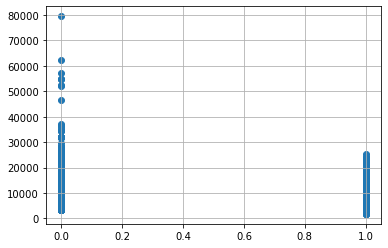

In [80]:
var='Hyderabad'
plt.scatter(x=data_train[var], y=data_train['Price'])
plt.grid(True)

variation of prices based on the cities.

In [81]:
data_train.isnull().sum()

Total_Stops                          0
Price                                0
date_of_Journey                      0
month_of_journey                     0
Dep_hour                             0
Dep_minute                           0
Arrival_hour                         0
Arrival_minute                       0
Duration_hours                       0
Duration_mins                        0
Air India                            0
GoAir                                0
IndiGo                               0
Jet Airways                          0
Jet Airways Business                 0
Multiple carriers                    0
Multiple carriers Premium economy    0
SpiceJet                             0
Trujet                               0
Vistara                              0
Vistara Premium economy              0
Chennai                              0
Delhi                                0
Kolkata                              0
Mumbai                               0
Cochin                   

In [82]:
#checking for skewness in the data
data_train.skew()

Total_Stops                            0.631681
Price                                  1.812552
date_of_Journey                        0.118351
month_of_journey                      -0.387493
Dep_hour                               0.113073
Dep_minute                             0.167029
Arrival_hour                          -0.369988
Arrival_minute                         0.110945
Duration_hours                         0.850862
Duration_mins                         -0.090841
Air India                              1.815130
GoAir                                  7.218042
IndiGo                                 1.562748
Jet Airways                            0.582095
Jet Airways Business                  42.166335
Multiple carriers                      2.461716
Multiple carriers Premium economy     28.618184
SpiceJet                               3.185227
Trujet                               103.358599
Vistara                                4.399442
Vistara Premium economy               59

The data skewness should be in the range of -0.5 t0 0.5 but in this case there is skewness existing with some of the columns.But all the columns which are having skewness are of categorical type so we dont deal with skewness.

In [83]:
#seperating label and features in x and y variables
x=data_train.drop(columns=['Price'],axis=1)
y=data_train['Price']

In [169]:
x.head()

,Total_Stops,date_of_Journey,month_of_journey,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Duration_hours,Duration_mins,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata
0,4,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,1,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,1,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
3,0,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [120]:
#Train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=450)

### Regression Models

In [121]:
#importing all the required libraries to build our model

from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn import metrics

### Linear Regression

In [122]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

### Predicting model evaluation

In [123]:
y_pred_lr=lr.predict(x_test)
y_pred_lr

array([ 1777.2105504 , 13056.42940106,  4265.82032665, ...,
        8352.79699001, 11048.35887482, 12937.56691696])

### Actual Prediction

In [124]:
y_pred=lr.predict(test_data)
y_pred

array([11549.69195361,  7399.33719684, 11309.53492064, ...,
       12967.77834246, 10904.84847256,  9554.08434023])

### Train Score

In [125]:
lr.score(x_train,y_train)

0.5804343121207491

### Model Score

In [126]:
lr.score(x_test,y_test)

0.569311507900476

In [127]:
# finding cross val score 

scr=cross_val_score(lr,x,y,cv=5)
print('Cross validation score: ',scr.mean()*100)

Cross validation score:  57.46469967924527


### Error calculation

In [128]:
mean_absolute_error(y_test,y_pred_lr)

2093.259229327903

In [129]:
mean_squared_error(y_test,y_pred_lr)

9133942.767815799

In [130]:
np.sqrt(mean_squared_error(y_test,y_pred_lr))

3022.241348373058

### KNeighors Regressor

In [131]:
knn=KNeighborsRegressor()
knn.fit(x_train,y_train)

KNeighborsRegressor()

### Predicting Model evaluation

In [132]:
y_pred_knn=knn.predict(x_test)
y_pred_knn

array([ 1934.2,  9914.6,  5876.2, ...,  9586.2, 13170.8, 12381.6])

### Actual Prediction

In [133]:
y_pred=knn.predict(test_data)
y_pred

array([12526. ,  4826.6, 13011. , ..., 13880.4, 10992.4,  8803.2])

### Train Score

In [134]:
knn.score(x_train,y_train)

0.7329246156842906

### Test Score

In [135]:
knn.score(x_test,y_test)

0.5792231520073751

### Cross validation score

In [136]:
scr=cross_val_score(knn,x,y,cv=5)
print('Cross validation score: ',scr.mean()*100)

Cross validation score:  58.69181171987552


### Error calcuation

In [137]:
mean_absolute_error(y_test,y_pred_knn)

1870.6210408086858

In [138]:
mean_squared_error(y_test,y_pred_knn)

8923738.892699365

In [139]:
np.sqrt(mean_squared_error(y_test,y_pred_knn))

2987.2627759705647

### Decision Tree Regressor

In [140]:
DT=DecisionTreeRegressor()
DT.fit(x_train,y_train)

DecisionTreeRegressor()

### predicting model evaluation

In [141]:
#Predicting for x_test
y_pred_DT=DT.predict(x_test)

### Actual prediction

In [142]:
#predicting for data_test
y_pred=DT.predict(test_data)

### training score

In [143]:
DT.score(x_train,y_train)

0.971131261372966

### Testing score

In [144]:
#score
DT.score(x_test,y_test)*100

72.45139162876828

### Cross validation score

In [145]:
#Finding cross val score
scr=cross_val_score(DT,x,y,cv=5)
print('Cross validation score: ',scr.mean()*100)

Cross validation score:  68.84146547679346


### Error calculation

In [146]:
mean_squared_error(y_test,y_pred_DT)

5842445.684331295

In [147]:
mean_absolute_error(y_test,y_pred_DT)

1365.486234868339

In [148]:
np.sqrt(mean_absolute_error(y_test,y_pred_DT))

36.95248617980039

### Random Forest Regressor

In [149]:
Rf=RandomForestRegressor()
Rf.fit(x_train,y_train)

RandomForestRegressor()

### Predicting model evaluation

In [150]:
y_pred_model=Rf.predict(x_test)
y_pred_model

array([ 1999.36333333, 17717.27866667,  6451.91      , ...,
        6812.63      , 10959.07      , 14338.345     ])

### Actual prediction

In [151]:
y_pred=Rf.predict(test_data)
y_pred

array([14776.4375    ,  4677.91333333, 17124.93      , ...,
       18061.79166667, 14227.87      ,  7712.06      ])

### Training Score

In [152]:
Rf.score(x_train,y_train)

0.9535364880669199

### Testing Score

In [153]:
Rf.score(x_test,y_test)*100

81.82995720114683

### Cross validation score

In [154]:
#Finding cross val score
scr=cross_val_score(Rf,x,y,cv=5)
print('Cross validation score: ',scr.mean()*100)

Cross validation score:  81.09884586141334


### Error calculation

In [155]:
mean_absolute_error(y_test,y_pred_model)

1178.4901543690305

In [156]:
mean_squared_error(y_test,y_pred_model)

3853461.0062238965

In [157]:
np.sqrt(mean_squared_error(y_test,y_pred_model))

1963.0234349655373

### Support Vector machine

In [158]:
svm=SVR()
svm.fit(x_train,y_train)

SVR()

In [159]:
#predicting 
y_pred_svm=svm.predict(x_test)

In [160]:
#predicting 
y_pred=svm.predict(x_test)

In [161]:
#training score
svm.score(x_train,y_train)

0.0036960115657623804

In [162]:
#training score
svm.score(x_test,y_test)

0.007778318751490154

In [146]:
#cross validation
np.mean(cross_val_score(svm,x,y,cv=5))

0.004605131264739803

We are not acheiving the good score using Support vector Regressor

### Hyper Parameter Tuning

In [169]:
param_grid= {"max_depth":[1,3,5,7,9,11,12],"n_estimators": [10,20,30],"max_features": ["auto", "sqrt", "log2"],"min_samples_split": [2,4,8],"bootstrap":[True, False],"criterion":['mse','friedman_mse']}

In [170]:
GCV = GridSearchCV(Rf,param_grid,cv=5,n_jobs=-1)

In [171]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['mse', 'friedman_mse'],
                         'max_depth': [1, 3, 5, 7, 9, 11, 12],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [2, 4, 8],
                         'n_estimators': [10, 20, 30]})

In [172]:
GCV.best_params_

{'bootstrap': True,
 'criterion': 'friedman_mse',
 'max_depth': 12,
 'max_features': 'auto',
 'min_samples_split': 4,
 'n_estimators': 10}

### Random Forest Regressor

In [174]:
regressor= RandomForestRegressor(bootstrap=True,criterion='friedman_mse',max_depth=12,max_features='auto',min_samples_split=4,n_estimators=10)
regressor.fit(x_train,y_train)
rf= RandomForestRegressor()
rf.fit(x_train,y_train)
pred_rf= rf.predict(x_test)
y_pred=rf.predict(test_data)
print('Training Score:',rf.score(x_train,y_train))
print('Testing score:',rf.score(x_test,y_test)*100)
print('Cross validation score:',np.mean(cross_val_score(rf,x,y,cv=5)))
print('MAE:',mean_absolute_error(y_test,pred_rf))
print('MSE:',mean_squared_error(y_test,pred_rf))
print('RMSE:',np.sqrt(mean_squared_error(y_test,pred_rf)))

Training Score: 0.955212950469925
Testing score: 81.6868547454328
Cross validation score: 0.8118695741086752
MAE: 1176.1631956725105
MSE: 3883809.8468454327
RMSE: 1970.7384014235458


After gird search cv also there is no much improvement in the accuracy.Almost we can hit the accuracy upto 81% using Random Forest regressor

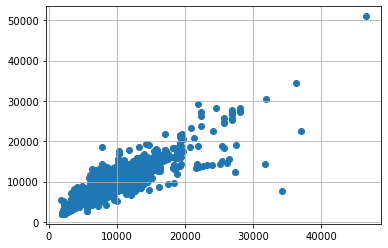

In [175]:
#Scatter plot
plt.scatter(x=y_test, y=pred_rf)
plt.grid(True)

The actual values and predicted values for model are linearly varying.

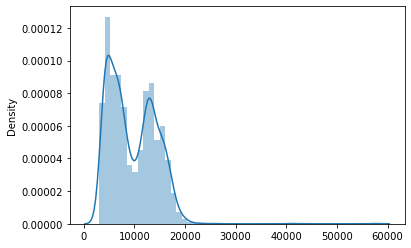

In [178]:
#Scatter plot for test data prediction
sns.distplot(y_pred)
plt.show()

<AxesSubplot:ylabel='Density'>

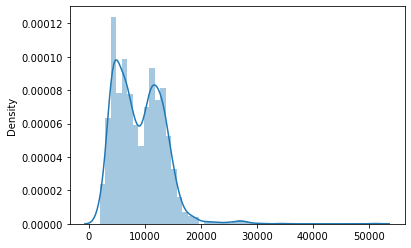

In [177]:
#dist plot for model predicting
sns.distplot(pred_rf)

### Saving the model

In [180]:
#Saving MOdel.
import joblib
joblib.dump(rf,'Flight Price Prediction.csv')

['Flight Price Prediction.csv']

In [181]:
print(pred_rf[:20])
print(y_test[:20].values)

[ 2001.61295238 16169.2605      6734.88        4846.
  7868.16666667 15119.67        4887.45        9481.01
  9559.5         4525.268      13658.165       2023.56466667
  6126.36666667 11813.20633333 14772.27264286  3794.36
 12035.85       12237.658      12129.57197619  7557.08      ]
[ 1965 13555  5755  4804  8855 15411  4668  9646  9646  4991 16079  1965
  5228 10262 16289  3850 13552 10262  8586  7038]


By using Random Forest Regressor we can achieve the score of 81%.